<img src="https://devra.ai/analyst/notebook/3525/image.jpg" style="width: 100%; height: auto;" />

<div style="text-align:center; border-radius:15px; padding:15px; color:white; margin:0; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;">  <div style="font-size:150%; color:#FEE100"><b>Exploring Global Mobile Prices and Features</b></div>  <div>This notebook was created with the help of <a href="https://devra.ai/ref/kaggle" style="color:#6666FF">Devra AI</a></div></div>Welcome to this in-depth exploration of the Global Mobile Prices 2025 dataset. If you find this notebook useful, please upvote it.

## Table of Contents

- [Introduction](#Introduction)
- [Data Loading and Preliminary Inspection](#Data-Loading-and-Preliminary-Inspection)
- [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Predictive Modeling](#Predictive-Modeling)
- [Conclusion](#Conclusion)

## Introduction

Smartphones are now ubiquitous, yet the intricate relationship between hardware specifications and price is still fascinating. In this notebook, we investigate the Global Mobile Prices 2025 dataset to uncover patterns, relationships, and potential predictors for smartphone pricing. Our insights may spark ideas for future market strategies or personal gadget selection.

In [1]:
# Setup for our analysis
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
matplotlib.use('Agg')  # Use non-interactive backend for matplotlib
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # Ensure plt uses Agg if only plt is imported

# Ensure inline plotting if running in a notebook environment
%matplotlib inline

# Set seaborn style
sns.set(style='whitegrid')

In [2]:
# Data Loading and Preliminary Inspection

# The data file is located in the same directory as the notebook
data_path = '/kaggle/input/world-smartphone-market-2025/Global_Mobile_Prices_2025_Extended.csv'
df = pd.read_csv(data_path, encoding='ascii', delimiter=',')

# Display the first few rows
print('Displaying the first 5 rows of the data:')
print(df.head())

# Display data info
print('\nDataframe Info:')
print(df.info())

# Display summary statistics
print('\nSummary statistics:')
print(df.describe())

Displaying the first 5 rows of the data:
    brand                  model  price_usd  ram_gb  storage_gb  camera_mp  \
0    Oppo                A98 111        855      16         128        108   
1  Realme            11 Pro+ 843        618       6         128         64   
2  Xiaomi  Redmi Note 14 Pro 461        258      16          64         64   
3    Vivo               V29e 744        837       6         512         48   
4   Apple  iPhone 16 Pro Max 927        335      12         128        200   

   battery_mah  display_size_inch  charging_watt 5g_support       os  \
0         6000                6.6             33        Yes  Android   
1         4500                6.9            100        Yes  Android   
2         4000                6.8             44        Yes  Android   
3         4500                6.0             65        Yes  Android   
4         5000                6.9            100        Yes      iOS   

        processor  rating release_month  year  
0       H

## Data Cleaning and Preprocessing

In this section, we address any data quality issues. A common approach is to check for missing values. Additionally, since the data contains a release month and a year, we can combine these to create a new `release_date` column. This is useful for any time-series analysis in future explorations.

In [3]:
# Data Cleaning

# Check for missing values
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

# Assuming release_month is a string (e.g., 'January'), combine with year to create a datetime column
try:
    # We assume day=1 for the release date
    df['release_date'] = pd.to_datetime(df['release_month'] + ' ' + df['year'].astype(str), format='%B %Y')
    print('\nRelease date successfully created.')
except Exception as e:
    print('Error encountered while creating release_date:', e)
    print('Ensure that the release_month column contains proper month names and year is numeric.')

# Display the updated dataframe columns
print('\nUpdated columns:', df.columns.tolist())

Missing values in each column:
brand                0
model                0
price_usd            0
ram_gb               0
storage_gb           0
camera_mp            0
battery_mah          0
display_size_inch    0
charging_watt        0
5g_support           0
os                   0
processor            0
rating               0
release_month        0
year                 0
dtype: int64

Release date successfully created.

Updated columns: ['brand', 'model', 'price_usd', 'ram_gb', 'storage_gb', 'camera_mp', 'battery_mah', 'display_size_inch', 'charging_watt', '5g_support', 'os', 'processor', 'rating', 'release_month', 'year', 'release_date']


## Exploratory Data Analysis

Our analysis will now dive into visualizing various aspects of the dataset. We shall explore the distribution of prices and other numeric features, examine relationships between features, and look at categorical distributions.

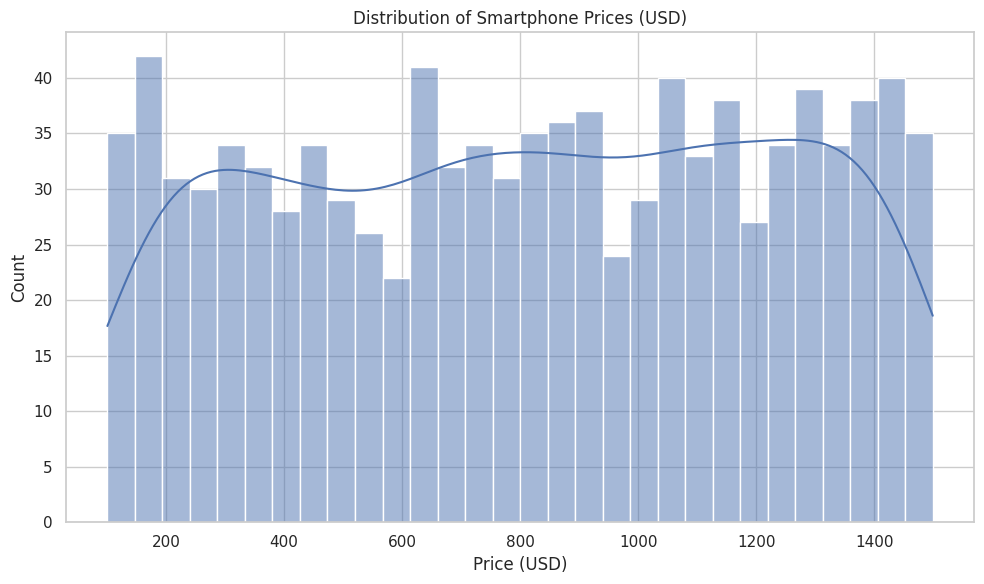

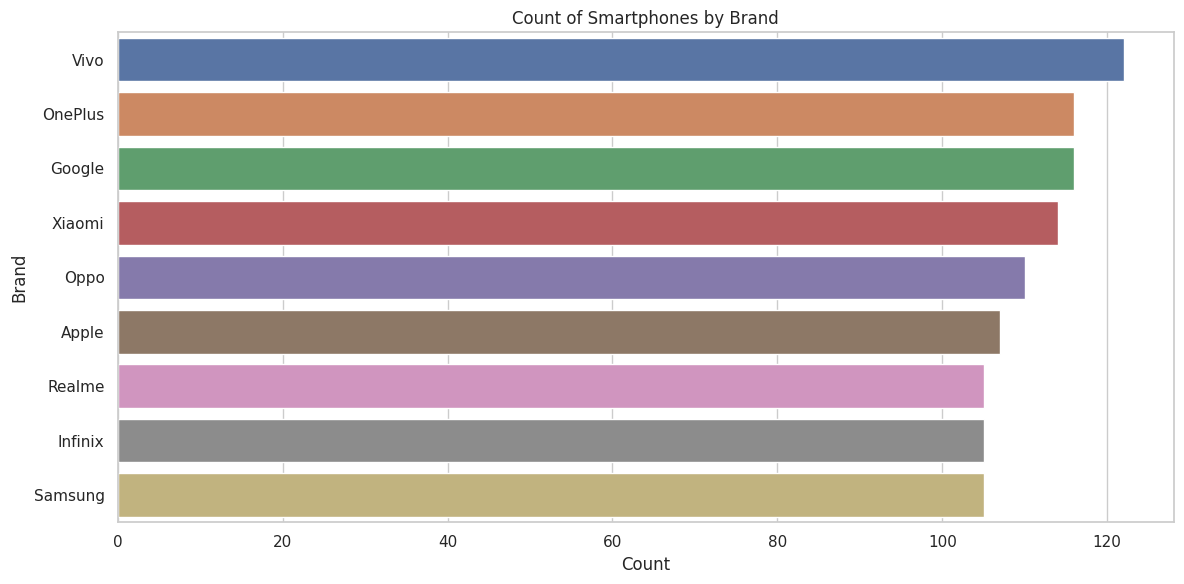

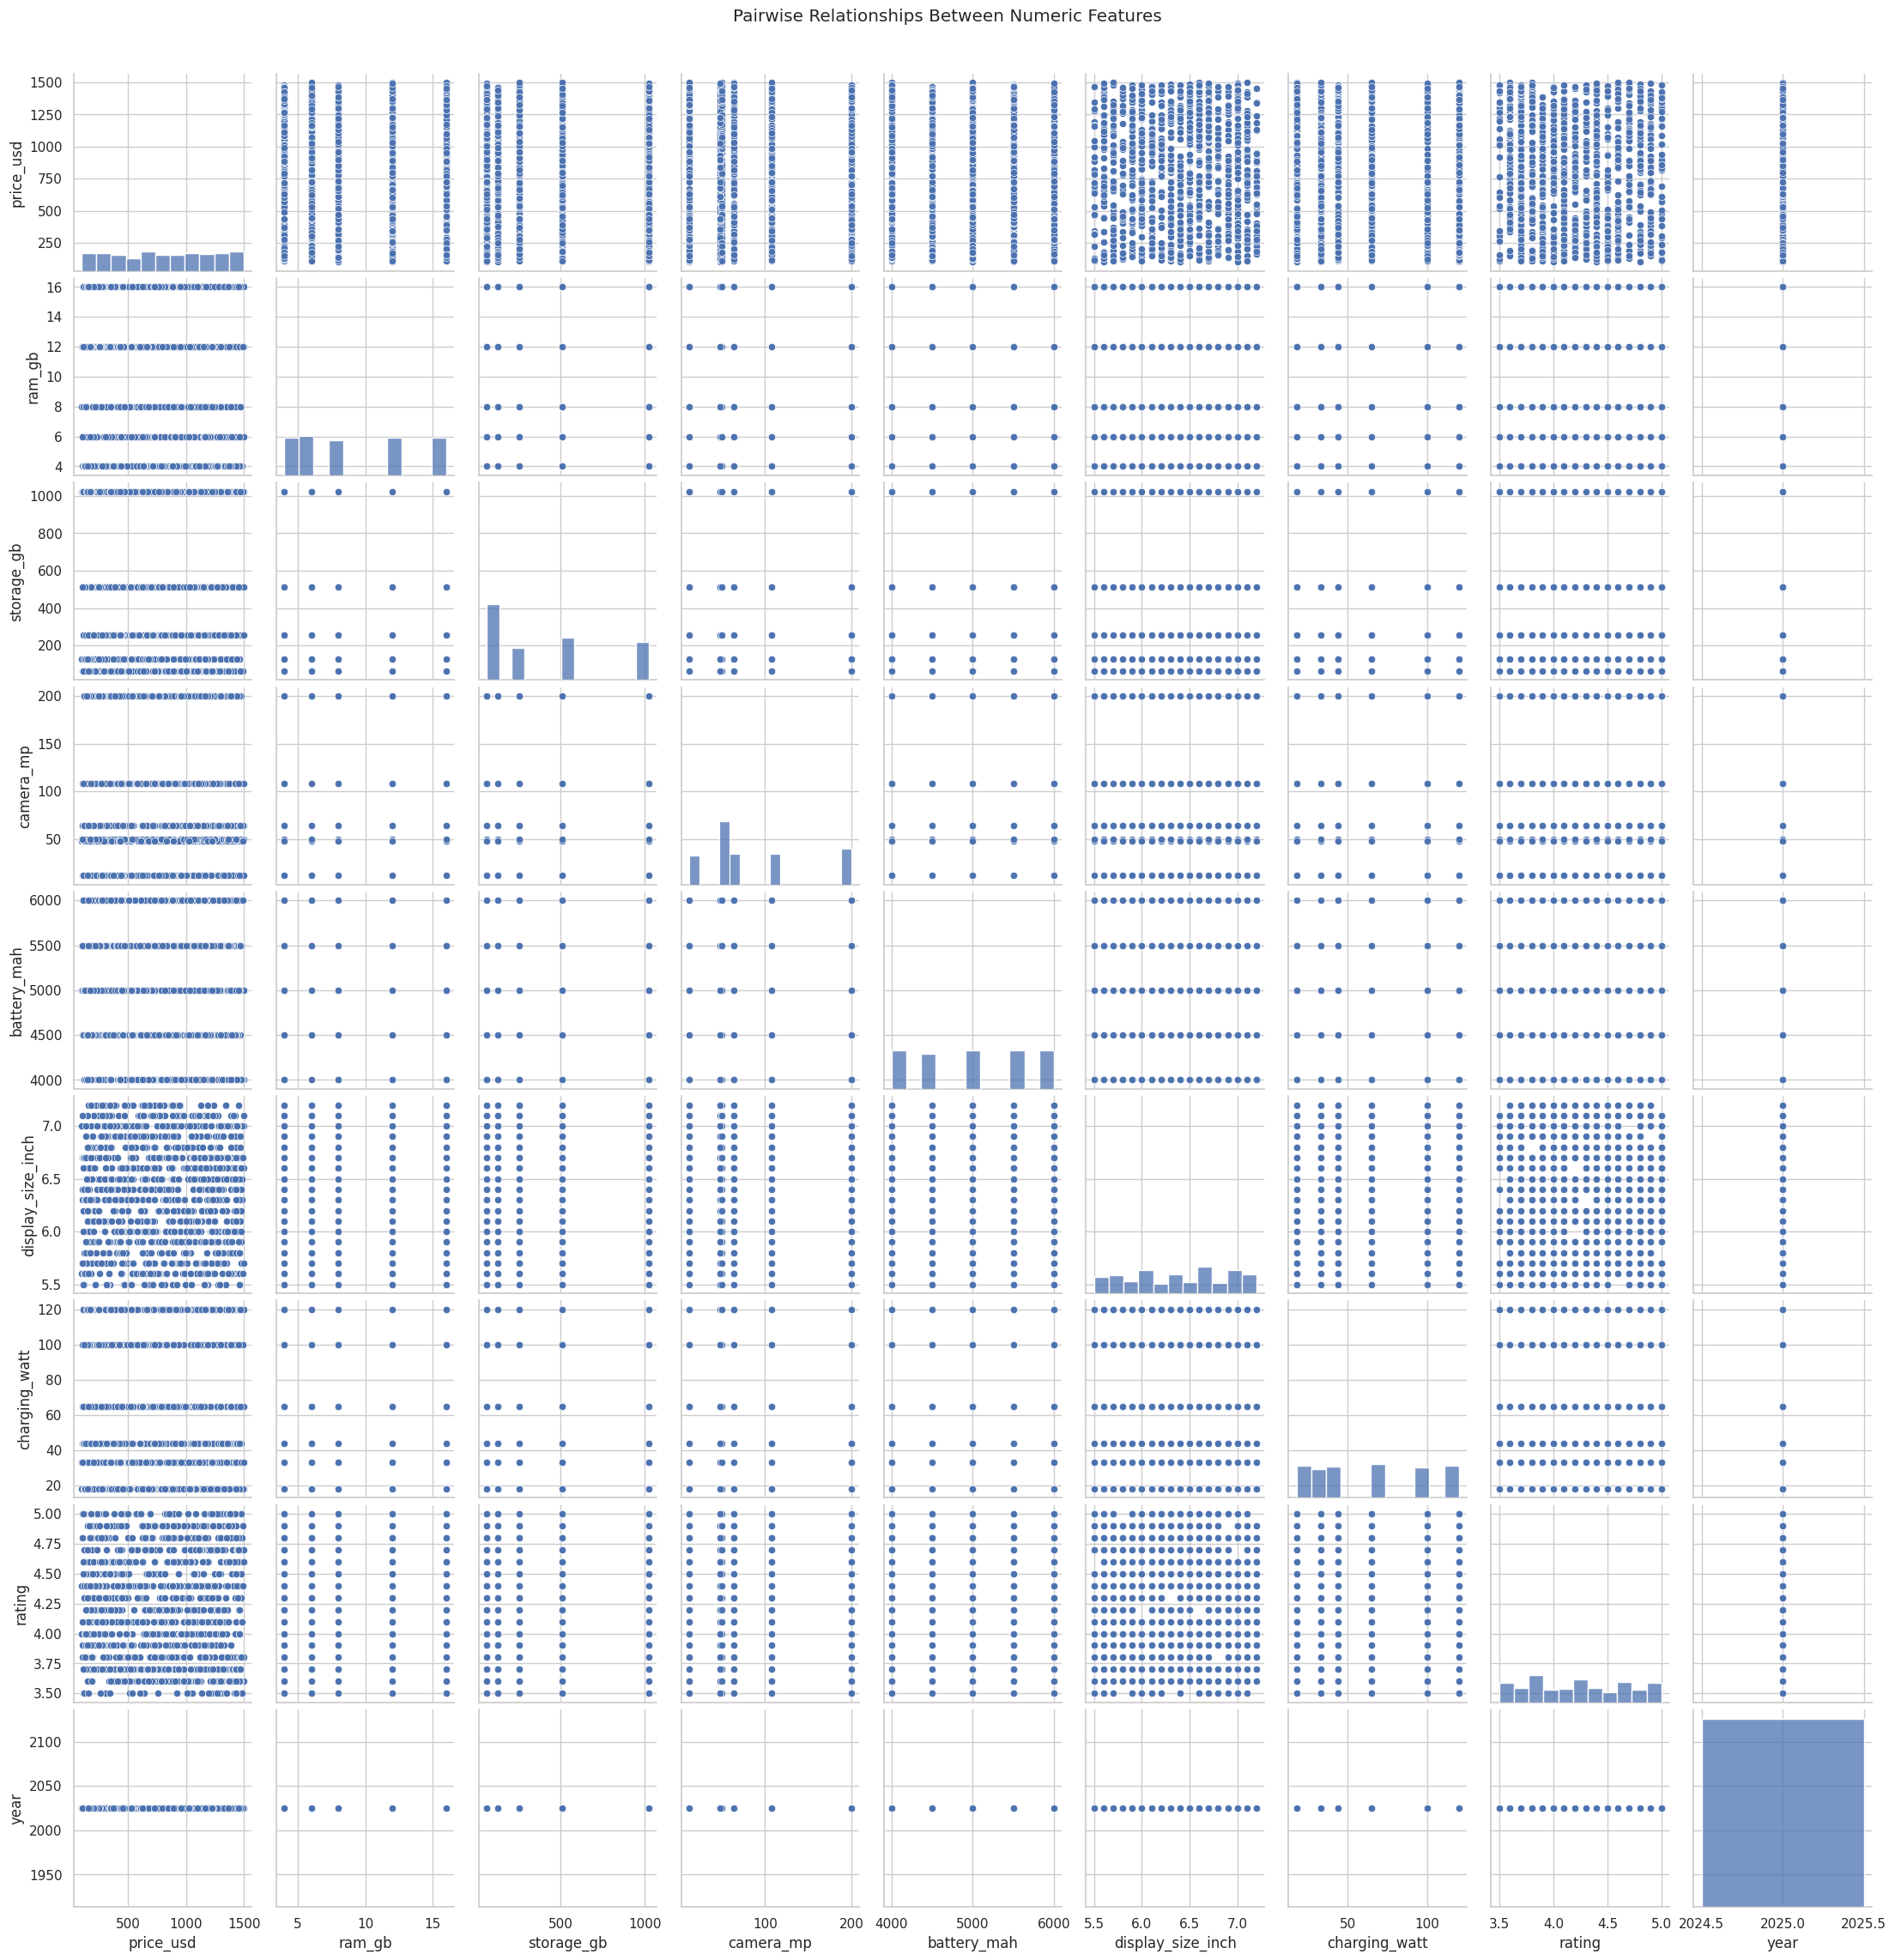

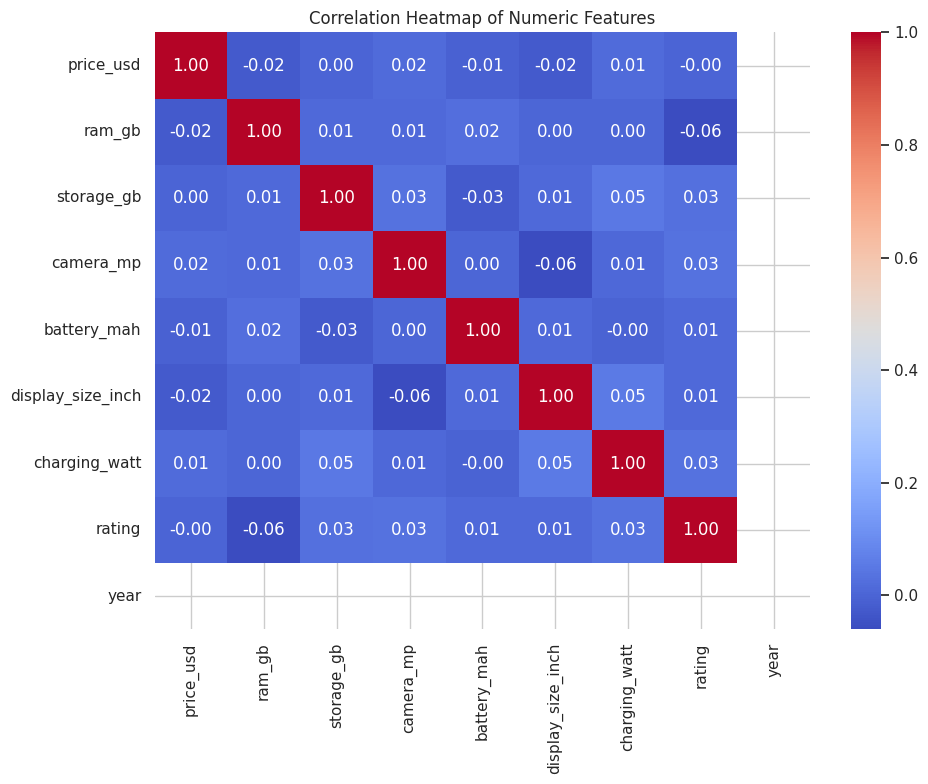

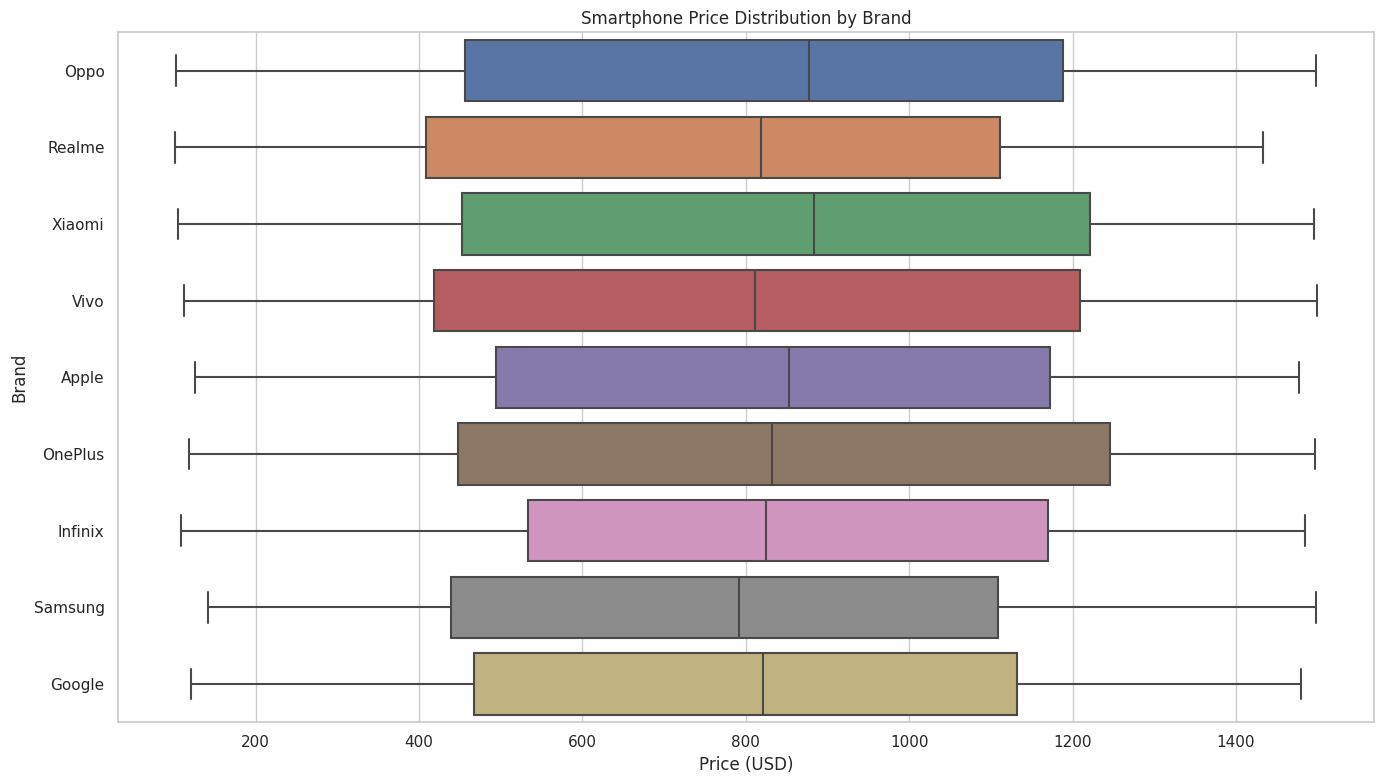

In [4]:
# Exploratory Data Analysis (EDA)

import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))
sns.histplot(df['price_usd'], bins=30, kde=True)
plt.title('Distribution of Smartphone Prices (USD)')
plt.xlabel('Price (USD)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Count plot for brands
plt.figure(figsize=(12, 6))
sns.countplot(y='brand', data=df, order=df['brand'].value_counts().index)
plt.title('Count of Smartphones by Brand')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

# Create a numeric dataframe and visualize relationships if there are four or more numeric columns
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    # Pair Plot
    sns.pairplot(numeric_df)
    plt.suptitle('Pairwise Relationships Between Numeric Features', y=1.02)
    plt.show()

    # Correlation Heatmap
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns for pair plots and correlation heatmap.')

# BoxPlot to see price distribution across different brands
plt.figure(figsize=(14, 8))
sns.boxplot(x='price_usd', y='brand', data=df)
plt.title('Smartphone Price Distribution by Brand')
plt.xlabel('Price (USD)')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

## Predictive Modeling

A natural question arising from the relationship between smartphone features and price is whether we can predict the smartphone price using the available features. In this section, we build a regression model to predict `price_usd` using several numeric features. We split the dataset into training and test sets, train a Random Forest Regressor, and report the R2 score. We also display a feature importance plot to identify the most influential features.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Selecting numeric features to predict price
# We drop columns that are identifiers or less meaningful for price prediction
features = ['ram_gb', 'storage_gb', 'camera_mp', 'battery_mah', 'display_size_inch', 'charging_watt', 'rating']

# Check if features exist in the dataframe
for col in features:
    if col not in df.columns:
        raise ValueError(f"Column {col} is missing from the data.")

X = df[features]
y = df['price_usd']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set and evaluate R2 score
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'Random Forest Regressor R2 Score: {r2:.3f}')

Random Forest Regressor R2 Score: -0.094


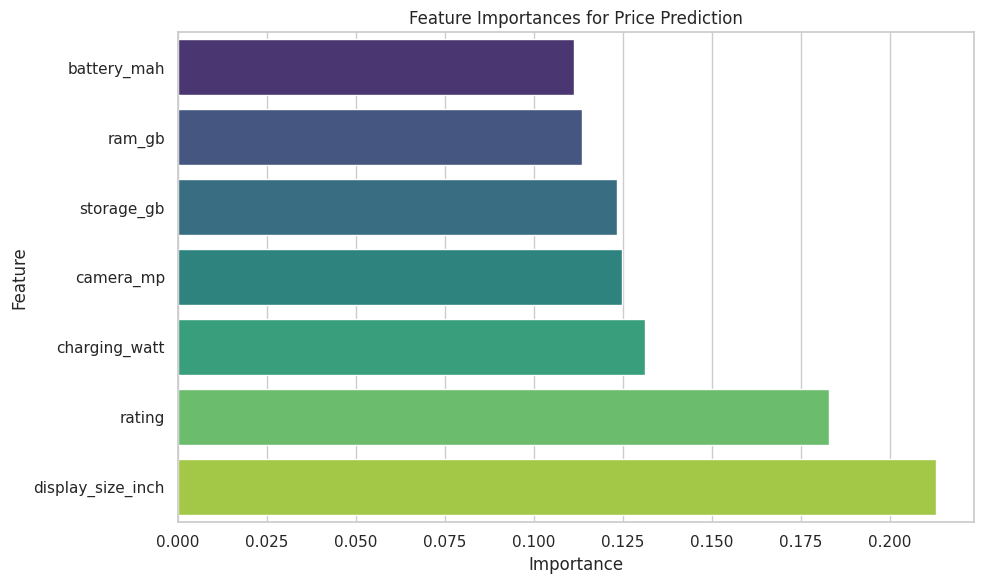

In [6]:
# Displaying feature importances using a horizontal bar plot
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance')

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances for Price Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Conclusion

This notebook provided a multi-faceted analysis of the Global Mobile Prices 2025 dataset. We began by exploring the data through visualizations and statistical summaries, followed by transforming and enriching the dataset by creating a datetime feature. We then built a Random Forest regression model to predict smartphone pricing based on several key numeric features, achieving a quantified performance score along with insights from feature importances.

Our approach highlights the importance of combining data cleaning, visualization, and predictive modeling in order to get a holistic view of the data. Future analyses might incorporate more advanced techniques such as hyperparameter tuning, feature engineering involving categorical features like brand and processor, or even deep learning models if larger datasets are available.

Thank you for reading. If you found this exploration useful, please consider upvoting this notebook.